In [69]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set(color_codes=True)
#sns.set_color_codes()

pd.options.display.max_rows = 15
pd.options.display.float_format = '{:,.3f}'.format

In [100]:
# 1- read data file
# 1- read processed file
file_dir = '../data/processed-data/'

data_file = 'standardized_normalized_dataset.csv'

data = pd.read_csv(file_dir + data_file)

In [71]:
data.head(5)

,svc_cpu_use,svc_cpu_thr,svc_net_use,svc_disk_use,system_cpu_use,system_cpu_sat,system_net_use,svc_req_size,svc_resp_size,svc_pods,svc_req_rate,ltcy
0,-2.397,-1.146,-2.165,-2.248,-1.571,-1.348,-2.094,-1.754,-1.289,-1.485,-1.998,0.332
1,-2.193,-1.270,-2.052,-2.129,-1.570,-1.347,-2.030,-1.672,-1.230,-1.485,-1.928,0.400
2,-2.221,-1.206,-2.008,-2.227,-1.571,-1.365,-2.023,-1.607,-1.181,-1.485,-1.866,0.469
3,-2.165,-1.270,-2.007,-1.404,-1.571,-1.337,-2.037,-1.624,-1.198,-1.709,-1.872,0.490
4,-2.221,-1.206,-1.955,-1.105,-1.571,-1.321,-2.049,-1.616,-1.192,-2.379,-1.862,0.500


## Function to build a model

In [101]:
# define the model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(11, input_dim=11, kernel_initializer='normal', activation='relu'))
    model.add(Dense(6, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [102]:
targets = data['ltcy']
inputs = data.drop(['ltcy'], axis=1)

x_train, x_test, y_train, y_test = \
    train_test_split(inputs, targets, test_size=0.2, random_state=365)


In [109]:


#estimators = []
##estimators.append(('standardize', StandardScaler()))
#estimators.append(('mlp', KerasRegressor(build_fn=larger_model, epochs=20, batch_size=5, verbose=1, shuffle=False)))
#pipeline = Pipeline(estimators)
#kfold = KFold(n_splits=10)
#results = cross_val_score(pipeline, x_train , y_train, cv=kfold)
#print("Model Result (mean and std of error): %.2f (%.2f) MSE" % (results.mean(), results.std()))

#model = baseline_model()
#model.fit(x_train, y_train, epoch=50, batch_size=20, verbose=True, shuffle=False)

estimators = []
##estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=20, batch_size=5, verbose=1, shuffle=False)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, x_train , y_train, cv=kfold)






Epoch 1/20
1140/1140 [==============================] - 4s 4ms/step - loss: 0.2173
Epoch 2/20
1140/1140 [==============================] - 0s 403us/step - loss: 0.0326
Epoch 3/20
1140/1140 [==============================] - 0s 407us/step - loss: 0.0244
Epoch 4/20
1140/1140 [==============================] - 0s 406us/step - loss: 0.0231
Epoch 5/20
1140/1140 [==============================] - 0s 403us/step - loss: 0.0227
Epoch 6/20
1140/1140 [==============================] - 0s 432us/step - loss: 0.0225
Epoch 7/20
1140/1140 [==============================] - 0s 420us/step - loss: 0.0223
Epoch 8/20
1140/1140 [==============================] - 0s 427us/step - loss: 0.0222
Epoch 9/20
1140/1140 [==============================] - 0s 418us/step - loss: 0.0221
Epoch 10/20
1140/1140 [==============================] - 0s 429us/step - loss: 0.0220
Epoch 11/20
1140/1140 [==============================] - 0s 419us/step - loss: 0.0220
Epoch 12/20
1140/1140 [==============================] - 0s 426us

1140/1140 [==============================] - 0s 431us/step - loss: 0.0215
Epoch 14/20
1140/1140 [==============================] - 0s 427us/step - loss: 0.0215
Epoch 15/20
1140/1140 [==============================] - 0s 425us/step - loss: 0.0214
Epoch 16/20
1140/1140 [==============================] - 0s 430us/step - loss: 0.0213
Epoch 17/20
1140/1140 [==============================] - 0s 423us/step - loss: 0.0213
Epoch 18/20
1140/1140 [==============================] - 0s 431us/step - loss: 0.0212
Epoch 19/20
1140/1140 [==============================] - 0s 429us/step - loss: 0.0212
Epoch 20/20
127/127 [==============================] - 1s 11ms/step
Epoch 1/20
1140/1140 [==============================] - 5s 4ms/step - loss: 0.2589
Epoch 2/20
1140/1140 [==============================] - 0s 426us/step - loss: 0.0424
Epoch 3/20
1140/1140 [==============================] - 0s 436us/step - loss: 0.0287 0s - loss: 0.029
Epoch 4/20
1140/1140 [==============================] - 0s 433us/step - 

1141/1141 [==============================] - 1s 452us/step - loss: 0.0229
Epoch 6/20
1141/1141 [==============================] - 1s 471us/step - loss: 0.0226
Epoch 7/20
1141/1141 [==============================] - 1s 472us/step - loss: 0.0223
Epoch 8/20
1141/1141 [==============================] - 1s 478us/step - loss: 0.0221
Epoch 9/20
1141/1141 [==============================] - 1s 466us/step - loss: 0.0220
Epoch 10/20
1141/1141 [==============================] - 1s 479us/step - loss: 0.0219
Epoch 11/20
1141/1141 [==============================] - 1s 451us/step - loss: 0.0218
Epoch 12/20
1141/1141 [==============================] - 1s 518us/step - loss: 0.0218
Epoch 13/20
1141/1141 [==============================] - 1s 518us/step - loss: 0.0217
Epoch 14/20
1141/1141 [==============================] - 1s 480us/step - loss: 0.0216
Epoch 15/20
1141/1141 [==============================] - 1s 460us/step - loss: 0.0215
Epoch 16/20
1141/1141 [==============================] - 1s 481us/step

In [110]:
regressor = pipeline.named_steps.model
print("Model Result (mean and std of error): %.2f (%.2f) MSE" % (results.mean(), results.std()))

Model Result (mean and std of error): -0.02 (0.00) MSE


In [113]:
regressor.fit(x_train, y_train)
y_hat = regressor.predict(x_train)
y_hat = pd.Series(y_hat)
y_hat.head()

Epoch 1/20
1267/1267 [==============================] - 5s 4ms/step - loss: 0.2205
Epoch 2/20
1267/1267 [==============================] - 1s 452us/step - loss: 0.0312
Epoch 3/20
1267/1267 [==============================] - 1s 450us/step - loss: 0.0237
Epoch 4/20
1267/1267 [==============================] - 1s 446us/step - loss: 0.0228
Epoch 5/20
1267/1267 [==============================] - 1s 491us/step - loss: 0.0224
Epoch 6/20
1267/1267 [==============================] - 1s 454us/step - loss: 0.0222
Epoch 7/20
1267/1267 [==============================] - 1s 454us/step - loss: 0.0220
Epoch 8/20
1267/1267 [==============================] - 1s 457us/step - loss: 0.0218
Epoch 9/20
1267/1267 [==============================] - 1s 445us/step - loss: 0.0217
Epoch 10/20
1267/1267 [==============================] - 1s 457us/step - loss: 0.0216
Epoch 11/20
1267/1267 [==============================] - 1s 466us/step - loss: 0.0215
Epoch 12/20
1267/1267 [==============================] - 1s 459us

0   0.81
1   0.58
2   0.53
3   0.78
4   0.86
dtype: float32

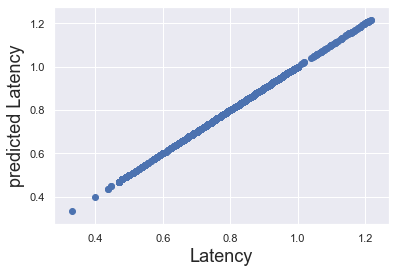

In [114]:
plt.scatter(y_train, y_train)
plt.xlabel('Latency', size=18)
plt.ylabel("predicted Latency", size=18)
#plt.xlim(-2,3)
#plt.ylim(-3,1)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

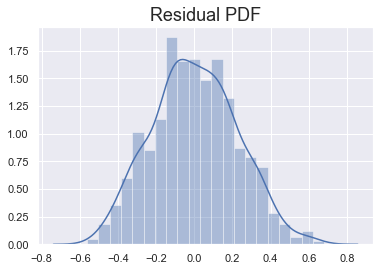

In [115]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

In [116]:
train_error =  np.abs(y_train - y_hat)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)

print("Model Result (mean and std of error): %.2f (%.2f) MSE" % (mean_error, std_error))

Model Result (mean and std of error): 0.18 (0.13) MSE


### Testing

In [117]:
y_hat_test = regressor.predict(x_test)
y_hat_test = pd.Series(y_hat_test)
y_test_hat.head()

317/317 [==============================] - 0s 363us/step


0   0.44
1   0.43
2   0.42
3   0.45
4   0.45
dtype: float32

<function matplotlib.pyplot.show(*args, **kw)>

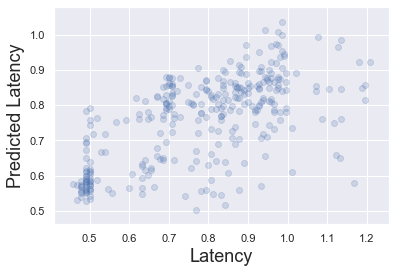

In [118]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Latency', size=18)
plt.ylabel('Predicted Latency', size=18)
plt.show

In [119]:
perf = pd.DataFrame(np.exp(y_hat_test), columns=['prediction'])
y_test = y_test.reset_index(drop=True)
perf['target'] = np.exp(y_test)
perf.head()

,prediction,target
0,2.24,2.00
1,2.22,2.01
2,1.88,1.88
3,2.32,2.70
4,2.40,2.07


In [120]:
perf['residual'] = perf['prediction'] - perf['target']
perf['difference%'] = np.absolute(perf['residual'] * 100 / perf['target'])
perf

,prediction,target,residual,difference%
0,2.24,2.00,0.24,11.91
1,2.22,2.01,0.21,10.23
2,1.88,1.88,-0.00,0.07
3,2.32,2.70,-0.38,14.19
4,2.40,2.07,0.33,16.01
5,2.28,1.96,0.33,16.77
6,1.81,1.65,0.16,9.74
7,1.77,1.62,0.15,9.31
8,1.71,1.65,0.06,3.51
9,1.85,1.90,-0.04,2.35


In [ ]:
perf.describe()

In [121]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
perf.sort_values(by = ['difference%'])

,prediction,target,residual,difference%
2,1.88,1.88,-0.00,0.07
161,2.00,2.00,0.00,0.22
138,2.37,2.38,-0.01,0.27
73,2.18,2.18,-0.01,0.28
241,2.18,2.18,-0.01,0.31
146,2.65,2.64,0.01,0.43
81,2.26,2.25,0.01,0.43
287,2.64,2.65,-0.01,0.48
220,1.83,1.84,-0.01,0.50
252,1.91,1.90,0.01,0.50
